# Midterm

SEOYEON CHOI  
2022-11-02

중간고사 대체과제

In [2]:
import torch 
import pandas as pd
import matplotlib.pyplot as plt
from fastai.vision.all import *

## `1`. 크롤링을 통한 이미지 분석 및 CAM

`(1)` 두 가지 키워드로 크롤링을 수행하여 이미지자료를 모아라. (키워드는
각자 마음에 드는 것으로 설정할 것)

***힌트1: `hynn`, `iu` 라는 키워드로 크롤링하여 이미지자료를 모으는
코드***

In [3]:
#
# 크롤링에 필요한 준비작업들
#!pip install -Uqq duckduckgo_search
from duckduckgo_search import ddg_images
from fastdownload import download_url
from fastcore.all import *
def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

``` python
# 
# 폴더만드는코드 -- 사실 손으로 만들어도 무방함.. 
!mkdir images
!mkdir images/train
!mkdir images/test 
!mkdir images/train/iu
!mkdir images/train/hynn
!mkdir images/test/iu
!mkdir images/test/hynn
```

``` python
download_images(dest='./images/train/iu',urls=search_images('iu',max_images=200)) # iu 라는 키워드로 200개 이미지 크롤링 -> ./images/train/iu 에 저장
time.sleep(10) # 서버과부하를 위한 휴식코드 
download_images(dest='./images/train/hynn',urls=search_images('hynn',max_images=200)) # hynn 이라는 키워드로 200개 이미지 크롤링 -> ./images/train/hynn 에 저장
time.sleep(10) # 서버과부하를 위한 휴식코드 
download_images(dest='./images/train/iu',urls=search_images('iu kpop',max_images=200))  # iu kpop 이라는 키워드로 200개 이미지 크롤링 -> ./images/train/iu 에 저장
time.sleep(10) # 서버과부하를 위한 휴식코드 
download_images(dest='./images/train/hynn',urls=search_images('hynn kpop',max_images=200)) # hynn kpop 이라는 키워드로 200개 이미지 크롤링 -> ./images/train/hynn 에 저장
time.sleep(10) # 서버과부하를 위한 휴식코드 
```

``` python
download_images(dest='./images/test/iu',urls=search_images('iu photo',max_images=50)) # iu photo 라는 키워드로 50개 이미지 크롤링 -> ./images/test/iu 에 저장
time.sleep(10) # 서버과부하를 위한 휴식코드 
download_images(dest='./images/test/hynn',urls=search_images('hynn photo',max_images=50)) # hynn photo 라는 키워드로 50개 이미지 크롤링 -> ./images/test/hynn 에 저장 
time.sleep(10) # 서버과부하를 위한 휴식코드 
```

***힌트2: 불량이미지 삭제***

``` python
bad_images = verify_images(get_image_files('./images'))
bad_images
```

-   불량이미지 목록

``` python
bad_images.map(Path.unlink)
```

-   불량이미지는 dls를 불러올때 방해되므로 제거

In [15]:
!mkdir images/train/bezos
!mkdir images/train/musk
!mkdir images/test/bezos
!mkdir images/test/musk

In [17]:
download_images(dest='./images/train/bezos',urls=search_images('jeff bezos',max_images=200))
time.sleep(10)
download_images(dest='./images/train/musk',urls=search_images('elon musk',max_images=200)) 
time.sleep(10)
download_images(dest='./images/train/bezos',urls=search_images('jeff bezos rich',max_images=200))  
time.sleep(10) 
download_images(dest='./images/test/musk',urls=search_images('elon musk rich',max_images=200)) 
time.sleep(10)

download_images(dest='./images/test/bezos',urls=search_images('jeff bezos photo',max_images=50)) # iu photo 라는 키워드로 50개 이미지 크롤링 -> ./images/test/iu 에 저장
time.sleep(10) # 서버과부하를 위한 휴식코드 
download_images(dest='./images/test/musk',urls=search_images('elon usk photo',max_images=50)) # hynn photo 라는 키워드로 50개 이미지 크롤링 -> ./images/test/hynn 에 저장 
time.sleep(10) # 서버과부하를 위한 휴식코드 

In [18]:
bad_images = verify_images(get_image_files('./images'))
bad_images

(#25) [Path('images/train/bezos/1d39746b-ad4d-49ac-ac25-0f569a94e3f2.jpg'),Path('images/train/bezos/ee365bea-bb15-4b79-9ebc-350d5a823ca8.JPG'),Path('images/train/bezos/289cbafa-0fbc-4be9-a39f-68429c876095.jpg'),Path('images/train/bezos/21495a5a-9602-42f5-8f7b-4978856bd1e8.jpg'),Path('images/train/bezos/3bd6c738-5361-4f95-9b3b-643904f5a135.jpg'),Path('images/train/bezos/2ca0722d-cb88-4f18-bc5f-c410bd16243f.jpg'),Path('images/train/bezos/e9924f91-aac6-4a11-a235-dacb7f80d576.jpg'),Path('images/train/bezos/fcc25b56-8807-4e52-bc37-6e1718994d8a.jpg'),Path('images/train/bezos/07e554ae-1261-4c81-b908-7c8d94e94702.jpg'),Path('images/train/bezos/ea6592bc-eff0-4db6-b93c-3b6e85897877.jpg')...]

In [19]:
bad_images.map(Path.unlink)

(#25) [None,None,None,None,None,None,None,None,None,None...]

`(2)` ImageDataLoaders.from_folder 를 이용하여 dls를 만들어라.

***힌트1: dls를 만드는 코드***

``` pythpn
dls = ImageDataLoaders.from_folder(path = './images', train='train',valid='test',item_tfms=Resize(512),bs=8) 
```

``` python
dls.show_batch()
```

In [20]:
dls = ImageDataLoaders.from_folder(path = './images', train='train',valid='test',item_tfms=Resize(512),bs=8) 

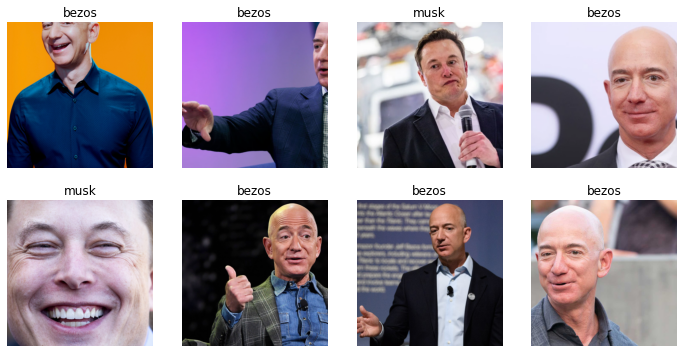

In [21]:
dls.show_batch()

`(3)` resnet34를 이용하여 학습하라.

In [23]:
lrnr = vision_learner(dls,resnet34,metrics=accuracy) 

In [24]:
lrnr.fine_tune(5)

/home/csy/anaconda3/envs/py37/lib/python3.7/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/csy/anaconda3/envs/py37/lib/python3.7/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/csy/anaconda3/envs/py37/lib/python3.7/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/csy/anaconda3/envs/py37/lib/python3.7/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/csy/anaconda3/envs/py3

`(4)` CAM (class activation mapping)을 이용하여 (3)의 모형의 판단근거를
시각화하라.

In [25]:
net1= lrnr.model[0]
net2= lrnr.model[1]

In [26]:
_X, _y = dls.one_batch() 

In [27]:
net1.to("cpu")
net2.to("cpu") 
_X = _X.to("cpu")

In [28]:
print(net1(_X).shape)
print(net2[0](net1(_X)).shape)
print(net2[1](net2[0](net1(_X))).shape)
print(net2[2](net2[1](net2[0](net1(_X)))).shape)

torch.Size([8, 512, 16, 16])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 1024])

In [29]:
net2= torch.nn.Sequential(
    torch.nn.AdaptiveAvgPool2d(output_size=1), # (64,512,16,16) -> (64,512,1,1) 
    torch.nn.Flatten(), # (64,512,1,1) -> (64,512) 
    torch.nn.Linear(512,2,bias=False) # (64,512) -> (64,2) 
)

In [30]:
net = torch.nn.Sequential(
    net1,
    net2
)

In [31]:
lrnr2= Learner(dls,net,metrics=accuracy) 

In [32]:
lrnr2.loss_func, lrnr.loss_func

(FlattenedLoss of CrossEntropyLoss(), FlattenedLoss of CrossEntropyLoss())

In [33]:
lrnr2.fine_tune(5) 

/home/csy/anaconda3/envs/py37/lib/python3.7/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/csy/anaconda3/envs/py37/lib/python3.7/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/csy/anaconda3/envs/py37/lib/python3.7/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/csy/anaconda3/envs/py37/lib/python3.7/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/csy/anaconda3/envs/py3

In [34]:
sftmax = torch.nn.Softmax(dim=1)

In [35]:
path = './images'

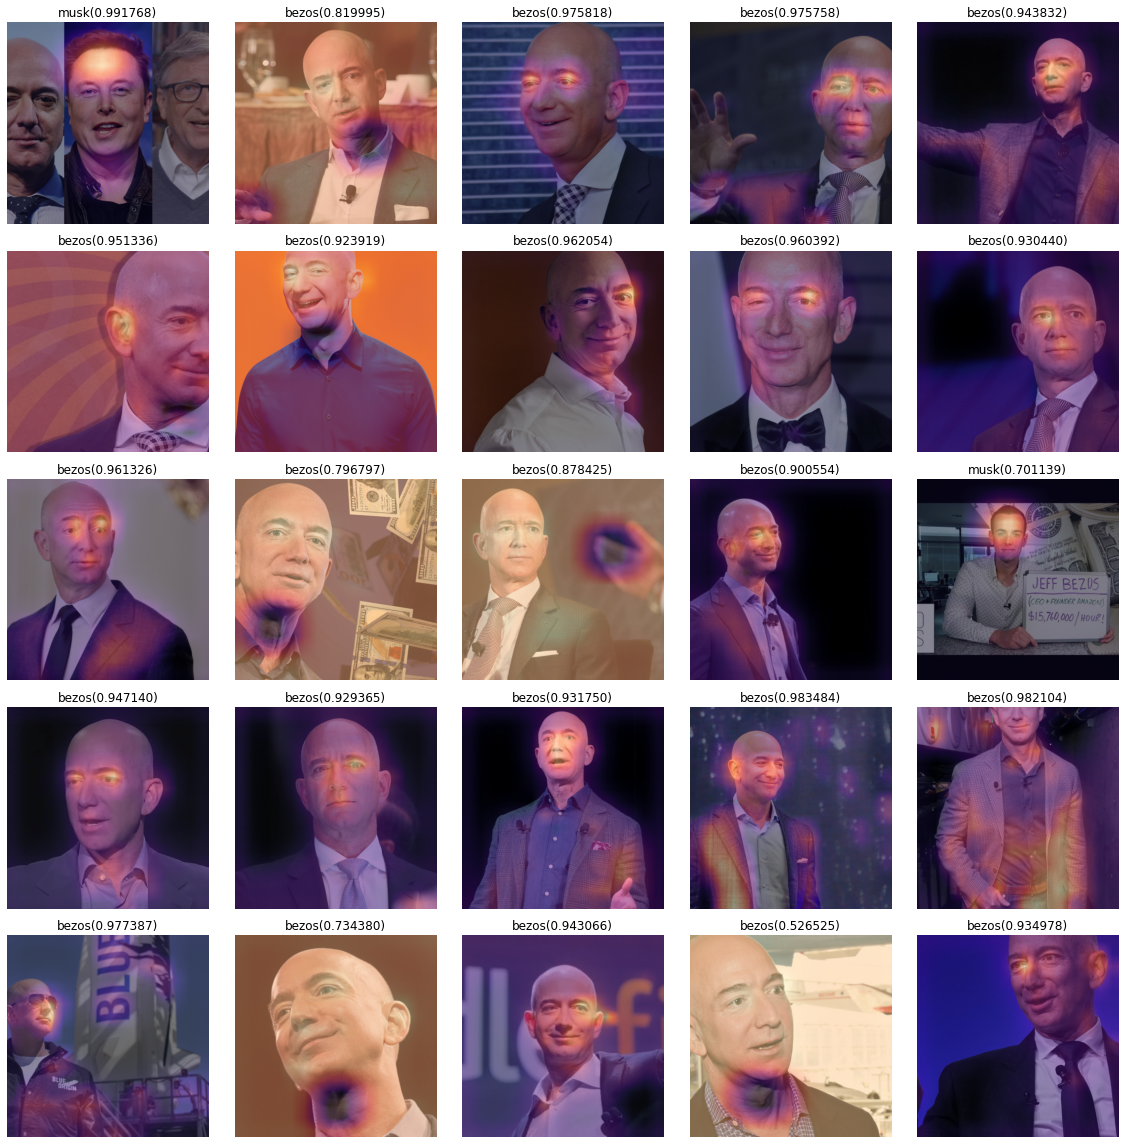

In [47]:
fig, ax = plt.subplots(5,5) 
k=200
for i in range(5):
    for j in range(5): 
        x, = first(dls.test_dl([PILImage.create(get_image_files(path)[k])]))
        why = torch.einsum('cb,abij -> acij', net2[2].weight, net1(x))
        why_bezos = why[0,0,:,:] 
        why_musk = why[0,1,:,:] 
        bezosprob, muskprob = sftmax(net(x))[0][0].item(), sftmax(net(x))[0][1].item()
        if bezosprob>muskprob: 
            dls.train.decode((x,))[0].squeeze().show(ax=ax[i][j])
            ax[i][j].imshow(why_bezos.to("cpu").detach(),alpha=0.5,extent=(0,511,511,0),interpolation='bilinear',cmap='magma')
            ax[i][j].set_title("bezos(%2f)" % bezosprob)
        else: 
            dls.train.decode((x,))[0].squeeze().show(ax=ax[i][j])
            ax[i][j].imshow(why_musk.to("cpu").detach(),alpha=0.5,extent=(0,511,511,0),interpolation='bilinear',cmap='magma')
            ax[i][j].set_title("musk(%2f)" % muskprob)
        k=k+1 
fig.set_figwidth(16)            
fig.set_figheight(16)
fig.tight_layout()

## `2`. Overparameterized Model

(풀이 있음)

아래와 같은 자료가 있다고 가정하자.

In [4]:
x = torch.rand([1000,1])*2-1
y = 3.14 + 6.28*x + torch.randn([1000,1]) 

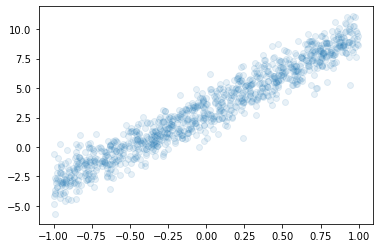

In [5]:
plt.plot(x,y,'o',alpha=0.1)

`(1)` 아래의 모형을 가정하고 $\beta_0,\beta_1$을 파이토치를 이용하여
추정하라.

-   $y_i = \beta_0 + \beta_1 x_i + \epsilon_i,\quad \epsilon_i \sim N(0,\sigma^2)$

In [6]:
net = torch.nn.Linear(in_features=1,out_features=1)

In [7]:
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

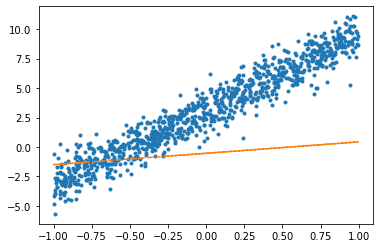

In [8]:
plt.plot(x,y,'.')
plt.plot(x,net(x).data,'--')

In [9]:
for epoc in range(100):
    yhat = net(x) 
    loss = torch.mean((yhat-y)**2)
    loss.backward()
    optimizr.step()
    optimizr.zero_grad() 

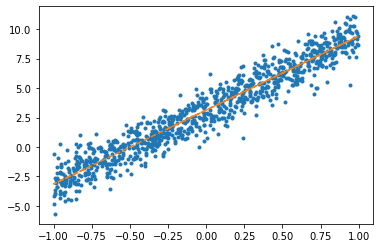

In [10]:
plt.plot(x,y,'.')
plt.plot(x,net(x).data,'--')

In [11]:
net.weight.data, net.bias.data

(tensor([[6.2839]]), tensor([3.1322]))

`(2)` 아래의 모형을 가정하고 $\beta_0$를 파이토치를 이용하여 추정하라.

-   $y_i = \beta_0 + \epsilon_i,\quad \epsilon_i \sim N(0,\sigma^2)$

In [12]:
W0hat = torch.tensor([0.0], requires_grad=True)

In [13]:
W0hat

tensor([0.], requires_grad=True)

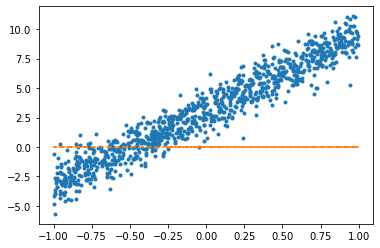

In [14]:
plt.plot(x,y,'.')
plt.plot(x,(0*x+W0hat).data,'--')

In [15]:
for epoc in range(100):
    yhat = 0 * x + W0hat
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    W0hat.data = W0hat.data - 0.1*W0hat.grad
    W0hat.grad = None

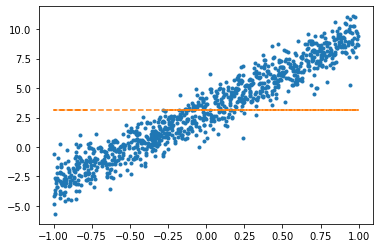

In [16]:
plt.plot(x,y,'.')
plt.plot(x,(0*x+W0hat).data,'--')

In [17]:
W0hat

tensor([3.1188], requires_grad=True)

`(3)` 아래의 모형을 가정하고 $\beta_1$을 파이토치를 이용하여 추정하라.

-   $y_i = \beta_1x_i + \epsilon_i \quad \epsilon_i \sim N(0,\sigma^2)$

In [18]:
net = torch.nn.Linear(1,1,bias = False)

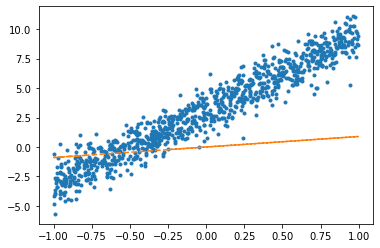

In [19]:
plt.plot(x,y,'.')
plt.plot(x,net(x).data,'--')

In [20]:
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

In [21]:
for epoc in range(100):
    yhat = net(x) 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    optimizr.step()
    optimizr.zero_grad() 

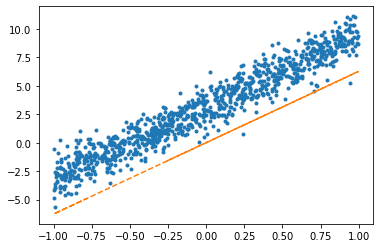

In [22]:
plt.plot(x,y,'.')
plt.plot(x,net(x).data,'--')

In [23]:
net.weight.data

tensor([[6.2637]])

`(4)` 아래의 모형을 가정하고 $\alpha_0,\beta_0,\beta_1$을 파이토치를
이용하여 추정하라.

-   $y_i = \alpha_0+\beta_0+ \beta_1x_i + \epsilon_i \quad \epsilon_i \sim N(0,\sigma^2)$

$\hat{\alpha}_0+\hat{\beta}_0$은 얼마인가? 이 값과 문제 (1)에서 추정된
$\hat{\beta_0}$의 값과 비교하여 보라.

In [524]:
_1= torch.ones([1000,1])
X = torch.concat([_1,x],axis=1)

In [525]:
net = torch.nn.Linear(in_features=2,out_features=1)

In [526]:
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

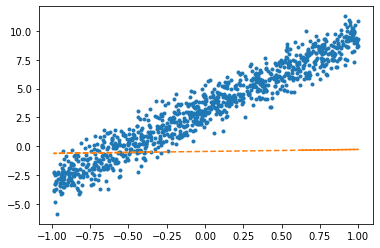

In [527]:
plt.plot(x,y,'.')
plt.plot(x,net(X).data,'--')

In [528]:
for epoc in range(100):
    yhat = net(X) 
    loss = torch.mean((yhat-y)**2)
    loss.backward()
    optimizr.step()
    optimizr.zero_grad() 

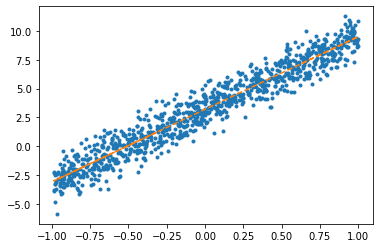

In [529]:
plt.plot(x,y,'.')
plt.plot(x,net(X).data,'--')

In [530]:
net.weight.data, net.bias.data

(tensor([[1.5093, 6.2918]]), tensor([1.6958]))

In [531]:
1.7377 + 1.4358

3.1734999999999998

In [532]:
6.2363

6.2363

`(5)` 아래의 모형을 가정하고 $\alpha_0,\alpha_1,\beta_0,\beta_1$을
파이토치를 이용하여 추정하라. – 이거 제가 힌트를 잘못줬어요.. 문제가 좀
어렵게나왔네요 ㅠㅠ

-   $y_i = \alpha_0+\beta_0+ \beta_1x_i + \alpha_1x_i + \epsilon_i \quad \epsilon_i \sim N(0,\sigma^2)$

$\hat{\alpha}_0+\hat{\beta}_0$, $\hat{\alpha}_1 + \hat{\beta}_1$의 값은
각각 얼마인가? 이 값들을 (1) 에서 추정된 $\hat{\beta}_0$,
$\hat{\beta}_1$ 값들과 비교하라.

In [533]:
_1= torch.ones([1000,1])
X = torch.concat([_1,x,x],axis=1)

In [534]:
net = torch.nn.Linear(in_features=3,out_features=1)

In [535]:
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

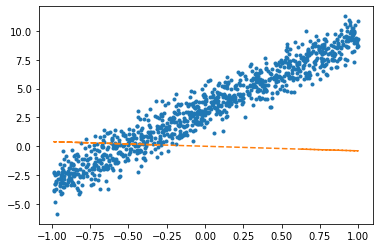

In [536]:
plt.plot(x,y,'.')
plt.plot(x,net(X).data,'--')

In [537]:
for epoc in range(100):
    yhat = net(X) 
    loss = torch.mean((yhat-y)**2)
    loss.backward()
    optimizr.step()
    optimizr.zero_grad() 

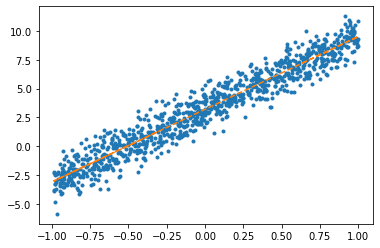

In [538]:
plt.plot(x,y,'.')
plt.plot(x,net(X).data,'--')

In [539]:
net.weight.data, net.bias.data

(tensor([[1.2913, 3.4037, 2.8956]]), tensor([1.9138]))

In [540]:
1.9599 + 1.2138

3.1737

In [541]:
3.2835 + 2.9585

6.242

`(6)` 다음은 위의 모형에 대하여 학생들이 discussion한 결과이다. 올바르게
해석한 학생을 모두 골라라.

**민정**: $(x_i,y_i)$의 산점도는 직선모양이고 직선의 절펴과 기울기 모두
유의미해 보이므로 $y_i = \beta_0 + \beta_1 x_i$ 꼴을 적합하는게 좋겠다.

**슬기**: 나도 그렇게 생각해. 그래서 (2)-(3)과 같이 기울기를 제외하고
적합하거나 절편을 제외하고 적합하면 underfitting의 상황에 빠질 수 있어.

**성재**: (2)의 경우 사실상 $\bar{y}=\frac{1}{n}\sum_{i=1}^{n}y_i$를
추정하는 것과 같아지게 되지.

**세민**: (4)의 경우
${\bf X}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots & \dots \\ 1 & x_n \end{bmatrix}$
와 같이 설정하고 네트워크를 아래와 같이 설정할 경우 얻어지는 모형이야.

``` python
net = torch.nn.Linear(in_features=2,out_features=1,bias=True)
```

**구환**: 모델 (4)-(5)는 표현력은 (1)과 동일하지만 추정할 파라메터는
(1)보다 많으므로 효율적인 모델이라고 볼 수 없어.

**answer** : 민정, 슬기, 세민, 구환

***이 문제의 경우 풀이를
[여기](https://guebin.github.io/DL2022/2022/10/26/Assignment-2.html)에서
확인할 수 있습니다.***

## `3`. 차원축소기법과 표현학습

다음은 아이리스데이터를 불러오는 코드이다. (아이리스 데이터에 대한
자세한 설명은 생략한다. 잘 모르는 학생은 구글검색을 해볼 것)

In [1490]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/STML2022/master/_notebooks/iris.csv")
df

150 rows × 5 columns

In [1496]:
X = torch.tensor(df.drop(columns=['Species']).to_numpy(), dtype=torch.float32)

`(1)` 아래를 만족하도록 적당한 아키텍처, 손실함수를 설계하라.
(손실함수는 MSE를 이용)

-   $\underset{(150,4)}{\bf X} \overset{l_1}{\to} \underset{(150,2)}{\bf Z} \overset{l_2}{\to} \underset{(150,4)}{\bf \hat X}$

-   ${\bf \hat X} \approx {\bf X}$

차원축소

In [1497]:
X[:5]

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])

In [1498]:
X.shape

torch.Size([150, 4])

In [1499]:
net = torch.nn.Sequential(
    torch.nn.Linear(4,2,bias=False),
    torch.nn.Linear(2,4,bias = False)
)

In [1500]:
Z = net[0](X)

In [1501]:
Z.type()

'torch.FloatTensor'

In [1502]:
Z[:5]

tensor([[-0.8808, -1.5322],
        [-0.8771, -1.5868],
        [-0.8091, -1.4178],
        [-0.8198, -1.4608],
        [-0.8528, -1.4621]], grad_fn=<SliceBackward0>)

In [1503]:
Xhat = net[1](net[0](X))

In [1504]:
Xhat.type()

'torch.FloatTensor'

In [1505]:
Xhat[:5]

tensor([[-0.6900, -1.1176, -0.2331, -0.6170],
        [-0.6969, -1.1495, -0.2264, -0.6290],
        [-0.6355, -1.0328, -0.2131, -0.5692],
        [-0.6478, -1.0610, -0.2137, -0.5826],
        [-0.6646, -1.0692, -0.2276, -0.5922]], grad_fn=<SliceBackward0>)

`(2)` 아래코드를 이용하여 ${\bf X}$, ${\bf Z}$, ${\bf \hat{X}}$를 시각화
하라.

(시각화예시)

``` python
fig,ax = plt.subplots(figsize=(10,10)) 
ax.imshow(torch.concat([X,Z,Xhat],axis=1)[:10])
ax.set_xticks(np.arange(0,10)) 
ax.set_xticklabels([r'$X_1$',r'$X_2$',r'$X_3$',r'$X_4$',r'$Z_1$',r'$Z_2$',r'$\hat{X}_1$',r'$\hat{X}_2$',r'$\hat{X}_3$',r'$\hat{X}_4$'])
ax.vlines([3.5,5.5],ymin=-0.5,ymax=9.5,lw=2,color='red',linestyle='dashed')
ax.set_title(r'First 10 obs of $\bf [X, Z, \hat{X}]$ // before learning',size=25);
```

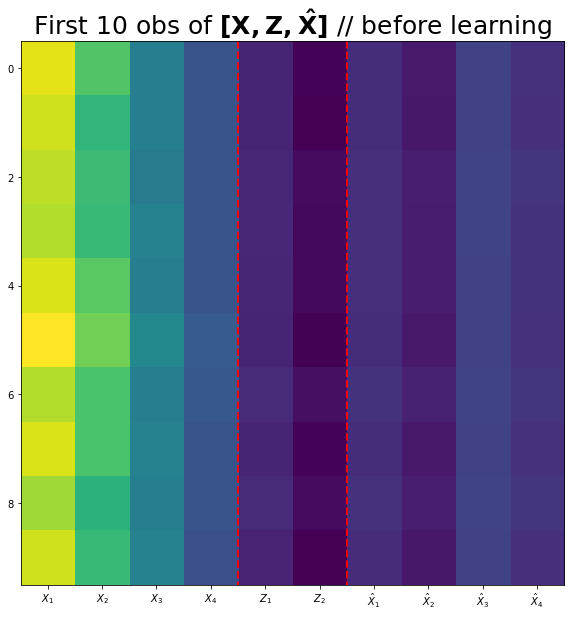

In [1506]:
fig,ax = plt.subplots(figsize=(10,10)) 
ax.imshow(torch.concat([X,Z.data,Xhat.data],axis=1)[:10])
ax.set_xticks(np.arange(0,10)) 
ax.set_xticklabels([r'$X_1$',r'$X_2$',r'$X_3$',r'$X_4$',r'$Z_1$',r'$Z_2$',r'$\hat{X}_1$',r'$\hat{X}_2$',r'$\hat{X}_3$',r'$\hat{X}_4$'])
ax.vlines([3.5,5.5],ymin=-0.5,ymax=9.5,lw=2,color='red',linestyle='dashed')
ax.set_title(r'First 10 obs of $\bf [X, Z, \hat{X}]$ // before learning',size=25);

`(3)` 네트워크를 학습시키고 ${\bf X}, {\bf Z}, {\bf \hat{X}}$를
시각화하라.

(시각화예시)

``` python
fig,ax = plt.subplots(figsize=(10,10)) 
ax.imshow(torch.concat([X,Z,Xhat],axis=1)[:10])
ax.set_xticks(np.arange(0,10)) 
ax.set_xticklabels([r'$X_1$',r'$X_2$',r'$X_3$',r'$X_4$',r'$Z_1$',r'$Z_2$',r'$\hat{X}_1$',r'$\hat{X}_2$',r'$\hat{X}_3$',r'$\hat{X}_4$'])
ax.vlines([3.5,5.5],ymin=-0.5,ymax=9.5,lw=2,color='red',linestyle='dashed')
ax.set_title(r'First 10 obs of $\bf [X, Z, \hat{X}]$ // after learning',size=25);
```

In [1507]:
optimizr= torch.optim.Adam(net.parameters())

In [1508]:
loss_fn= torch.nn.MSELoss()

In [1509]:
for epoc in range(2000): 
    ## 1 
    Z = net[0](X) 
    Xhat = net[1](Z) 
    ## 2 
    loss=loss_fn(Xhat,X) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad() 

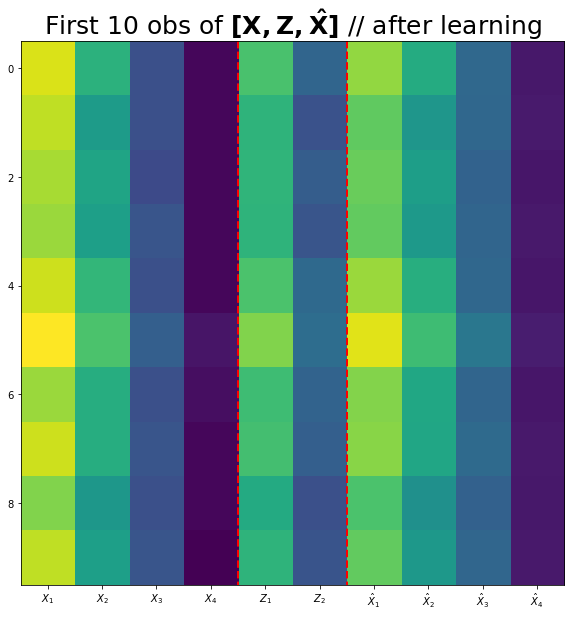

In [1510]:
fig,ax = plt.subplots(figsize=(10,10)) 
ax.imshow(torch.concat([X,Z.data,Xhat.data],axis=1)[:10])
ax.set_xticks(np.arange(0,10)) 
ax.set_xticklabels([r'$X_1$',r'$X_2$',r'$X_3$',r'$X_4$',r'$Z_1$',r'$Z_2$',r'$\hat{X}_1$',r'$\hat{X}_2$',r'$\hat{X}_3$',r'$\hat{X}_4$'])
ax.vlines([3.5,5.5],ymin=-0.5,ymax=9.5,lw=2,color='red',linestyle='dashed')
ax.set_title(r'First 10 obs of $\bf [X, Z, \hat{X}]$ // after learning',size=25);

`(4)` (3)의 결과로 학습된 $Z$를 입력벡터로 하고 $Z \to y=\text{Species}$
로 향하는 적당한 네트워크를 설계한 뒤 학습하라.

x-\>y가는 mapping 안 찾아도 - z-\>y 가는 mapping 적절히 잘 찾으면 -
x-\>y 적용가능한 linear function 찾기 가능

In [1515]:
Z.shape

torch.Size([150, 2])

In [1511]:
net = torch.nn.Linear(2,4)

In [1512]:
loss_fn= torch.nn.CrossEntropyLoss()

In [1513]:
optimizr= torch.optim.Adam(net.parameters())

In [1523]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 

In [1527]:
mapping = {'setosa':0,'versicolor':1,'virginica':2}

In [1536]:
y_base = list(df['Species'])

In [1537]:
y = torch.tensor(f(y_base,mapping))

In [1540]:
y.unique()

tensor([0, 1, 2])

In [1541]:
for epoc in range(2000): 
    ## 1 
    yhat = net(Z.data)
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad() 

In [1542]:
net.weight

Parameter containing:
tensor([[ 0.1512,  1.0270],
        [ 0.1297, -1.1137],
        [ 0.6069, -1.1514],
        [-0.5099, -0.4560]], requires_grad=True)

`(5)` (1)~(4)의 결과를 토의한 내용이다. 적절하게 토의한 사람을 모두
고르라.

**규빈**: ${\bf Z}$는 ${\bf X}$보다 적은 feature를 가지고 있다. 또한
적절한 선형변환을 하면 ${\bf X}$와 비슷한 ${\bf \hat X}$을 만들 수
있으므로 ${\bf X}$의 정보량 대부분 유지한채로 효과적으로 차원을 줄인
방법이라 볼 수 있다.

**민정**: 즉 ${\bf X}$에서 ${\bf y}$로 가는 맵핑을 학습하는 과업은
${\bf Z}$에서 ${\bf y}$로 가는 맵핑을 학습하는 과업은 거의 동등하다고 볼
수 있다.

**성재**: ${\bf Z}$의 차원을 (n,4)로 설정한다면 이론상 ${\bf X}$와
동일한 ${\bf \hat X}$을 만들어 낼 수 있다.

**슬기**: ${\bf Z}$의 차원이 (n,2)일지라도 경우에 따라서 ${\bf X}$와
동일한 ${\bf \hat X}$을 만들어 낼 수 있다.

**answer** : 규빈, 민정, 성재, 슬기